In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size = 18)

In [2]:
phones = pd.read_csv(r"F:\DATA SCIENCE\[Skillbox] Профессия‌ ‌Data‌ ‌Scientist‌ (2020)\1 Data Scientist. ML. Начальный уровень\01\1.8_phones.csv")


In [3]:
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


<function matplotlib.pyplot.show(close=None, block=None)>

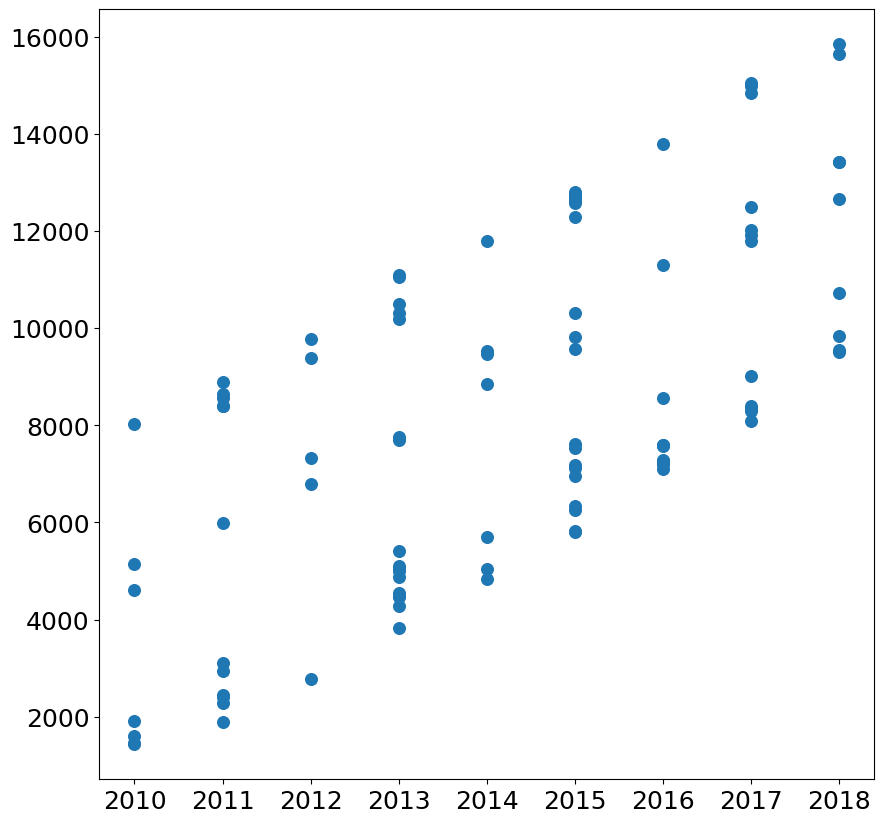

In [23]:
fig = plt.figure(figsize = (10, 10))  # создаем картинку
ax = plt.axes()

ax.scatter(phones["year"], phones["price"], s = 70)  # помещаем точки на график

plt.show 

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
X = phones[["year"]]
y = phones["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [12]:
[b] = reg.coef_
a = reg.intercept_

In [18]:
def reg_prediction(year):
    return a + b * year

In [20]:
reg_prediction(X.year[0])

9838.83475733595

In [15]:
reg.predict(X[0:1])[0]

9838.83475733595

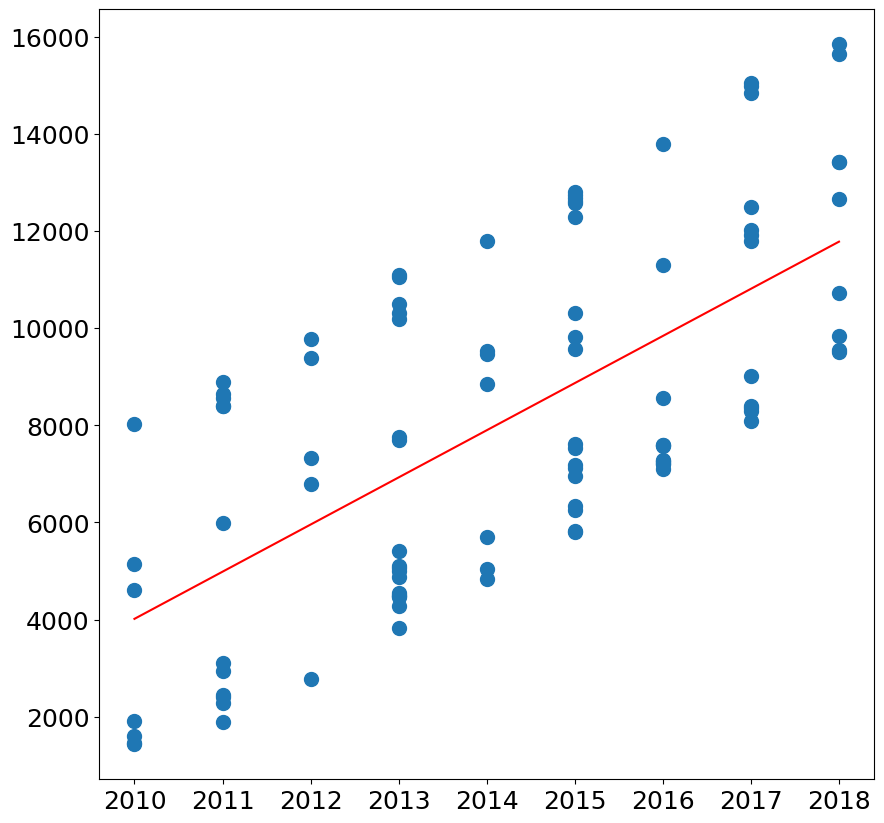

In [21]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="red")

# отображаем кар

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [26]:
X = phones[["year"]]
y = phones["price"]

# создаем классификатор
cl = DecisionTreeClassifier().fit(X, y)

In [27]:
print(export_text(cl))

|--- feature_0 <= 2017.50
|   |--- feature_0 <= 2010.50
|   |   |--- class: 1435
|   |--- feature_0 >  2010.50
|   |   |--- feature_0 <= 2011.50
|   |   |   |--- class: 1890
|   |   |--- feature_0 >  2011.50
|   |   |   |--- feature_0 <= 2012.50
|   |   |   |   |--- class: 2780
|   |   |   |--- feature_0 >  2012.50
|   |   |   |   |--- feature_0 <= 2013.50
|   |   |   |   |   |--- class: 3835
|   |   |   |   |--- feature_0 >  2013.50
|   |   |   |   |   |--- feature_0 <= 2014.50
|   |   |   |   |   |   |--- class: 4832
|   |   |   |   |   |--- feature_0 >  2014.50
|   |   |   |   |   |   |--- feature_0 <= 2015.50
|   |   |   |   |   |   |   |--- class: 5814
|   |   |   |   |   |   |--- feature_0 >  2015.50
|   |   |   |   |   |   |   |--- feature_0 <= 2016.50
|   |   |   |   |   |   |   |   |--- class: 7091
|   |   |   |   |   |   |   |--- feature_0 >  2016.50
|   |   |   |   |   |   |   |   |--- class: 8081
|--- feature_0 >  2017.50
|   |--- class: 13422



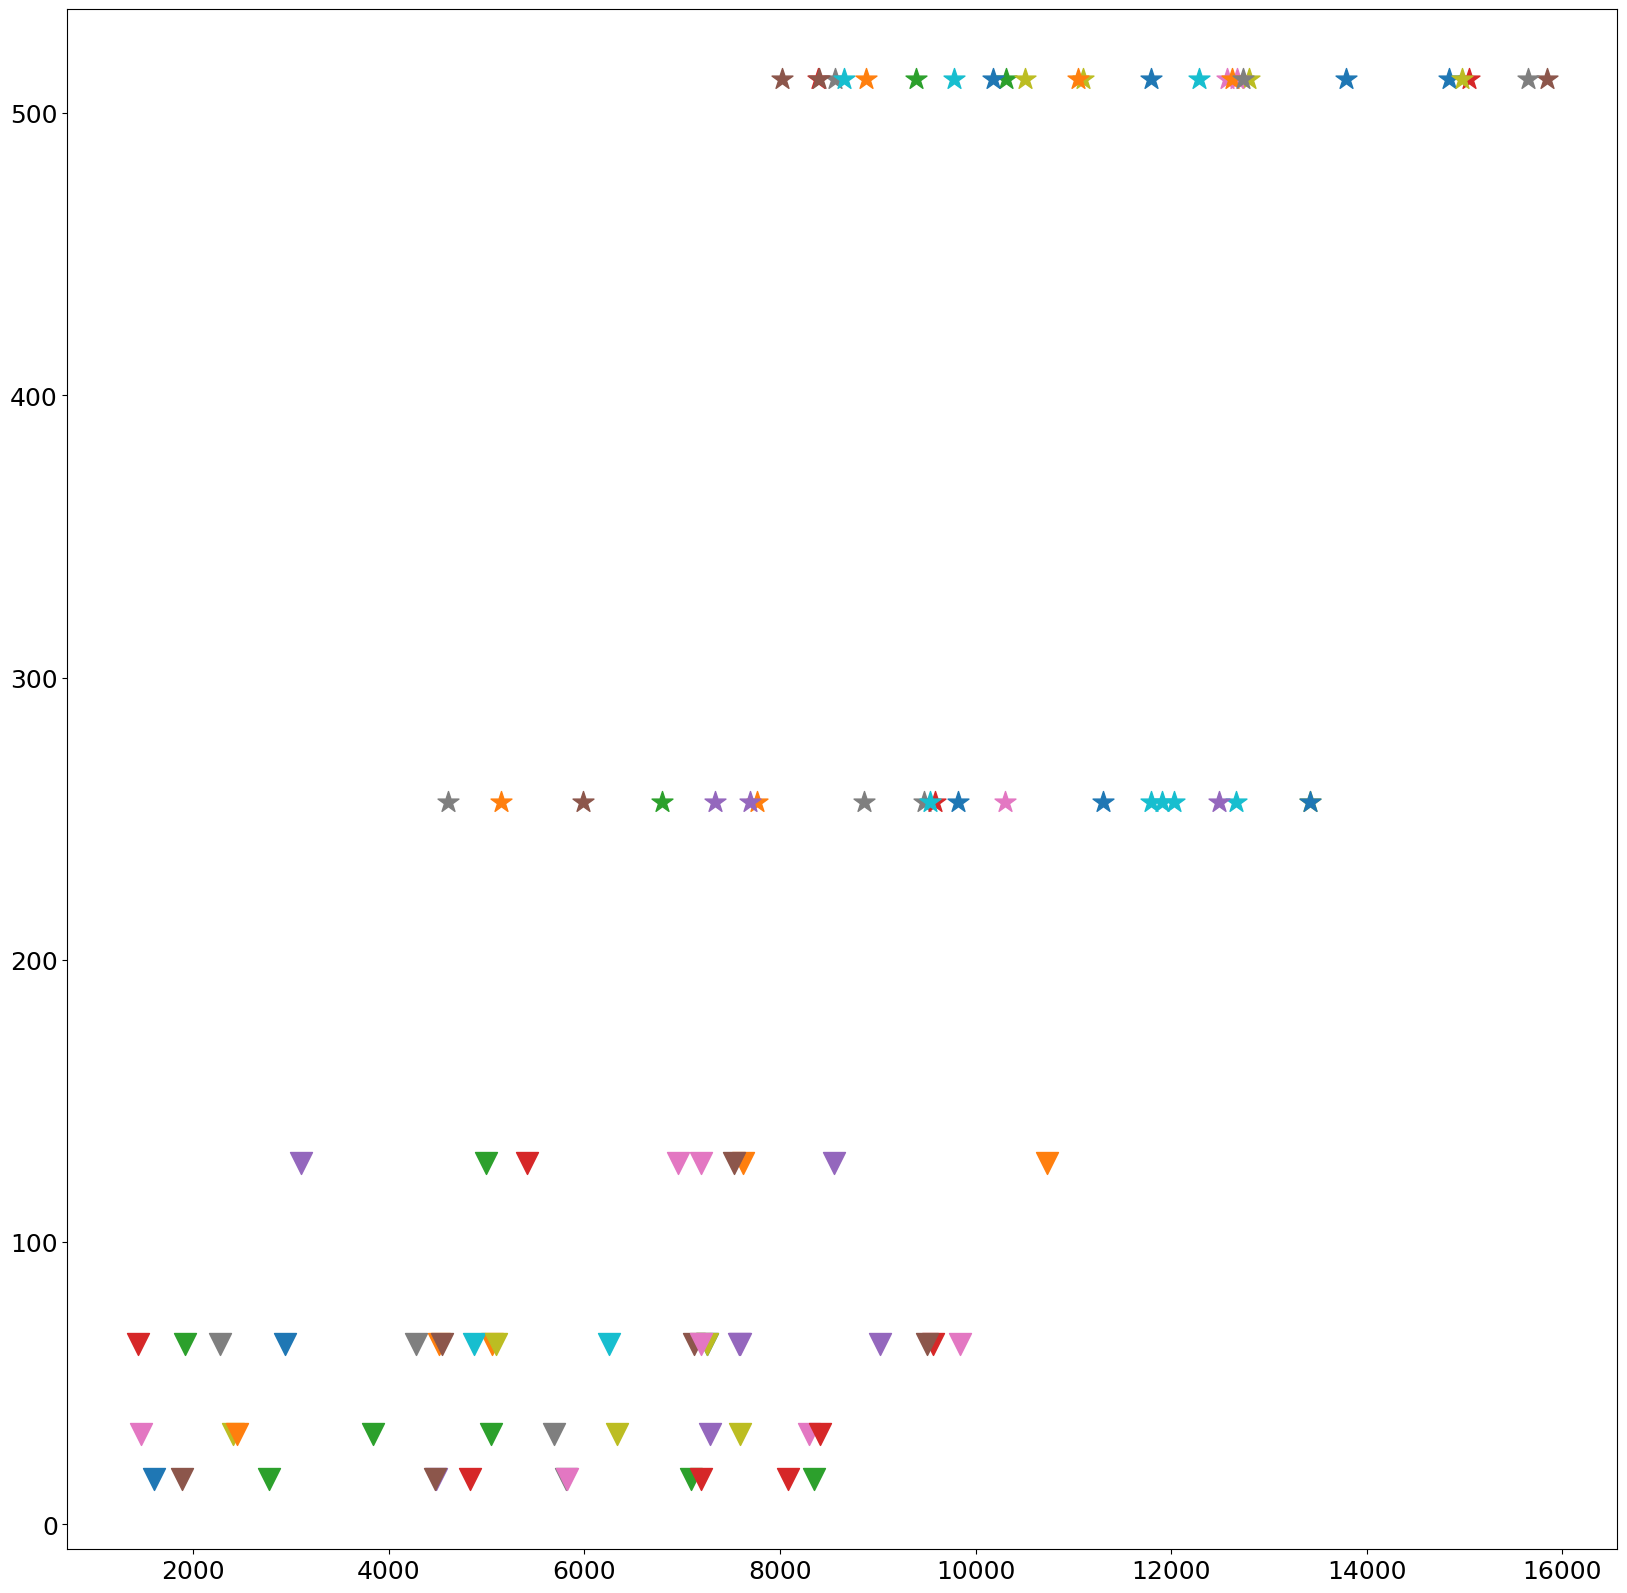

In [35]:
fig = plt.figure(figsize = (20, 20))  # создаем картинку

markers = {"Android": "v", "iOS": "*"}
for p1,d1, o in zip (phones.price, phones.disk, phones.os):
    plt.scatter(p1, d1,  s= 250, marker = markers[o])

plt.show()

In [36]:
from sklearn.cluster import KMeans

In [54]:
# выгружаем признаки в отдельную переменную
X = phones[["disk"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=3).fit(X)

C:\Users\lisov\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
[c1, c2, c3] = clust.cluster_centers_

In [56]:
clust.cluster_centers_

array([[ 57.35849057],
       [512.        ],
       [256.        ]])

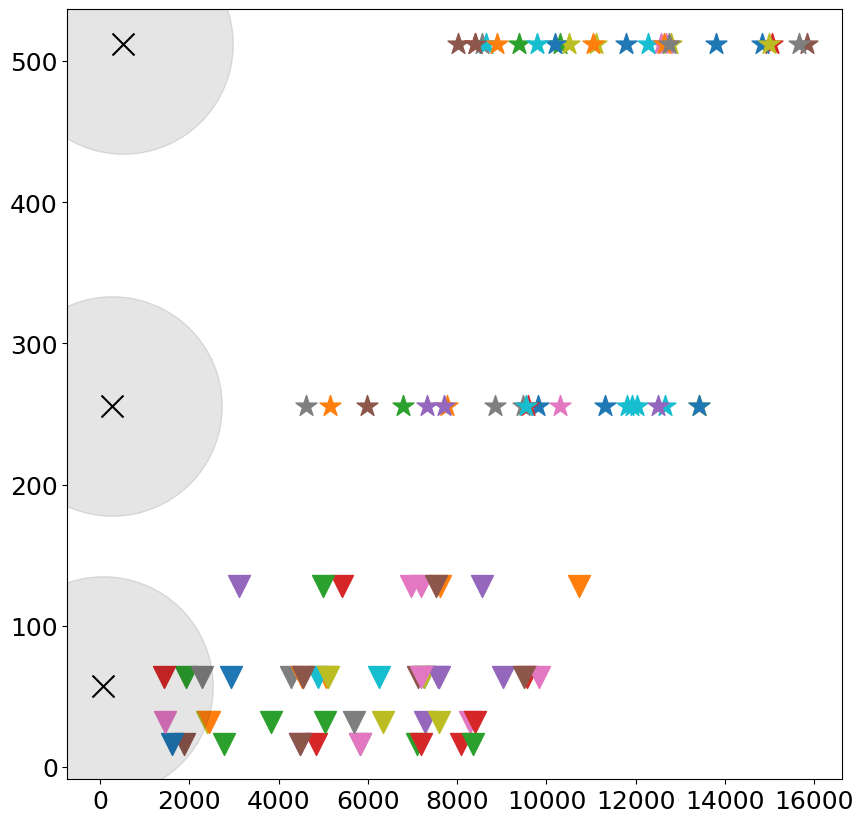

In [58]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "v", "iOS": "*"}
for p1,d1, o in zip (phones.price, phones.disk, phones.os):
    plt.scatter(p1, d1,  s= 250, marker = markers[o])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[0],  s=250, marker="x", c="black")
plt.scatter(c1[0], c1[0],  s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[0],  s=250, marker="x", c="black")
plt.scatter(c2[0], c2[0], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[0],  s=250, marker="x", c="black")
plt.scatter(c3[0], c3[0], s=250 * 1e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()